Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

sns.set(rc = {'figure.figsize':(20,7)})

Getting started with datasets

In [2]:
df1 = pd.read_csv('fraudTrain.csv', index_col=False)
df2 = pd.read_csv('fraudTest.csv', index_col=False)

data = pd.concat([df1, df2])

print(df1.shape, df2.shape, data.shape)

(1296675, 23) (555719, 23) (1852394, 23)


In [3]:
print("Head of dataset : ")
data.head()

Head of dataset : 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
print("Tail of dataset : ")
data.tail()

Tail of dataset : 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


Analyzing the dataset

In [5]:
#Checking for null values in the dataset
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
#Separating legal and illegal instances
legal = data[data.is_fraud == 0]
illegal = data[data.is_fraud == 1]
print(legal.shape, illegal.shape)

(1842743, 23) (9651, 23)


In [7]:
legal.amt.describe()

count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [8]:
illegal.amt.describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

Since data is imbalanced, undersampling will be used

In [9]:
#Undersampling
legal_under = legal.sample(illegal.shape[0]*5)
print(legal_under.shape)

(48255, 23)


In [10]:
legal_under.amt.describe()

count    48255.000000
mean        67.804311
std        150.748565
min          1.000000
25%          9.590000
50%         46.790000
75%         82.290000
max      10469.090000
Name: amt, dtype: float64

Since mean of original and undersampled data is almost equal, it means there is very less or no inconsistency 

In [11]:
under_sampled_data = pd.concat([legal_under, illegal], axis = 0)
print(under_sampled_data.shape)

(57906, 23)


Amount v/s Fraud relation

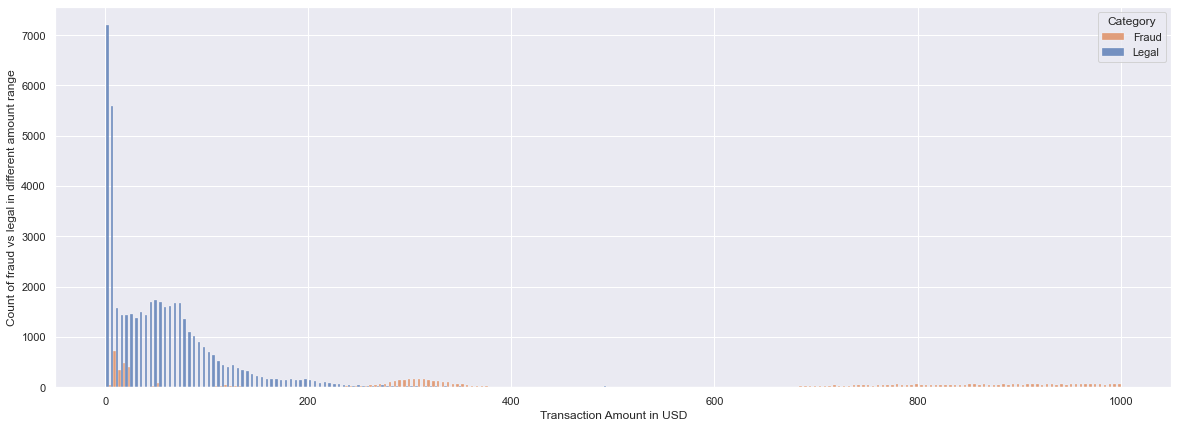

In [12]:
fig = sns.histplot(x = 'amt', data = under_sampled_data[under_sampled_data.amt <= 1000],
    hue = 'is_fraud', stat = 'count', multiple = 'dodge', common_norm = False)
fig.set_xlabel('Transaction Amount in USD')
fig.set_ylabel('Count of fraud vs legal in different amount range')
plt.legend(title = 'Category', labels = ['Fraud', 'Legal'])

This shows a clear relation. While most legal transactions occur near price range of $200 and less, illegal transactions rises at around $250 to $300 and then again at around $650 to $700 and more. Also, illegal transactions, also occur below $200 in some small amount range.
Hence, amount is an important feature or indicator.

Finding states with highest and lowest fraud rates.

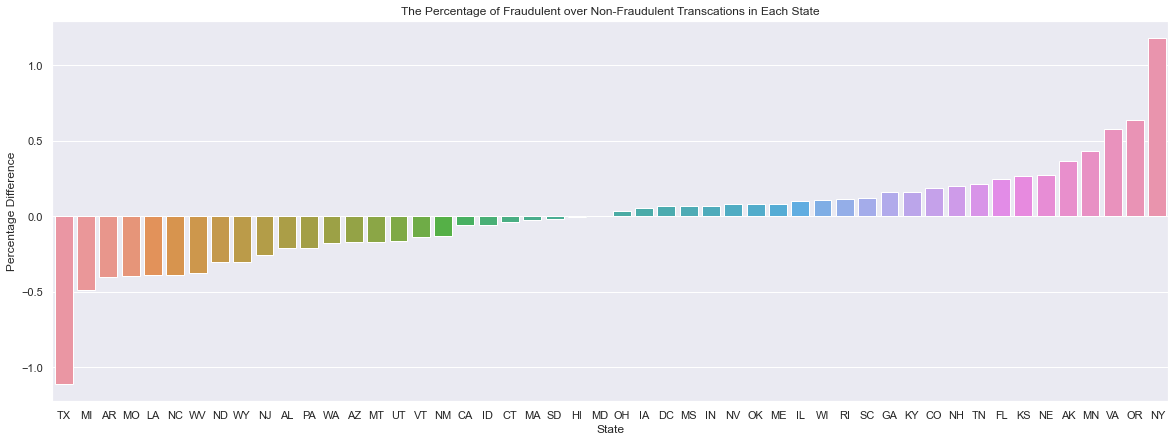

In [13]:
a = under_sampled_data['state'][under_sampled_data.is_fraud == 0].value_counts(normalize = True)   #legal
a = a.to_frame()
a = a.reset_index()
a.columns = ['State', 'Type']

b = under_sampled_data['state'][under_sampled_data.is_fraud == 1].value_counts(normalize = True)   #fraud
b = b.to_frame()
b = b.reset_index()
b.columns = ['State', 'Type']

merged = a.merge(b, on = 'State')
merged['Diff']=merged['Type_y']-merged['Type_x']
merged['Diff'] = merged['Diff'] * 100
merged = merged.sort_values('Diff')

fig2 = sns.barplot(data = merged, x = 'State',y = 'Diff')
fig2.set_xlabel('State')
fig2.set_ylabel('Percentage Difference')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')
plt.savefig('SFrel',dpi=300)

State with highest fraud percentage cases - NY | State with highest legal percentage cases - TX
Although, this can't decide the legality or illegality of transaction cases, it gives important insights on which states witness more fradulent cases than others.

Gender v/s Fraud relation (can be dropped)

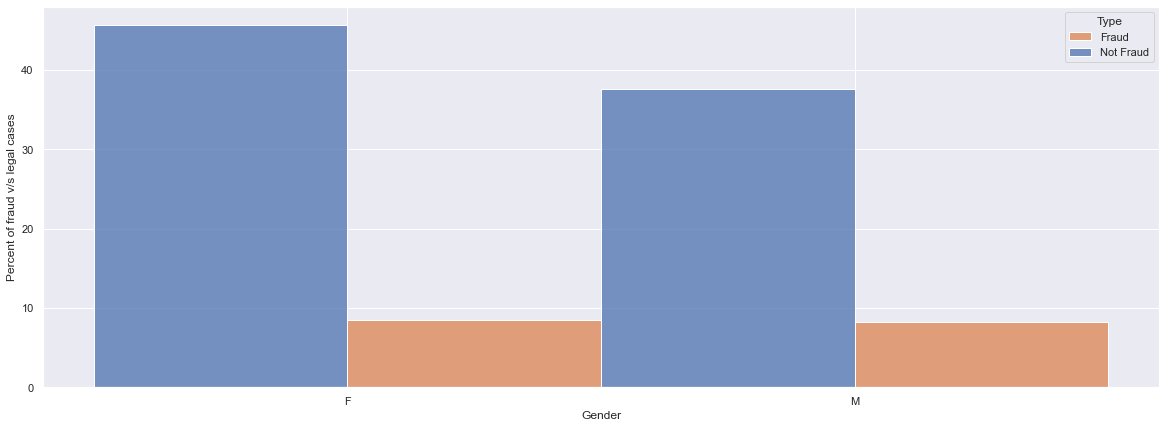

In [14]:
fig3 = sns.histplot(data = under_sampled_data, x = 'gender', hue = 'is_fraud', stat = 'percent', 
                    multiple = 'dodge')
fig3.set_xlabel('Gender')
fig3.set_ylabel('Percent of fraud v/s legal cases')
fig3.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The above histograph suggests that gender is not an important feature for fraudulent transactions.

Age v/s Fraud relation

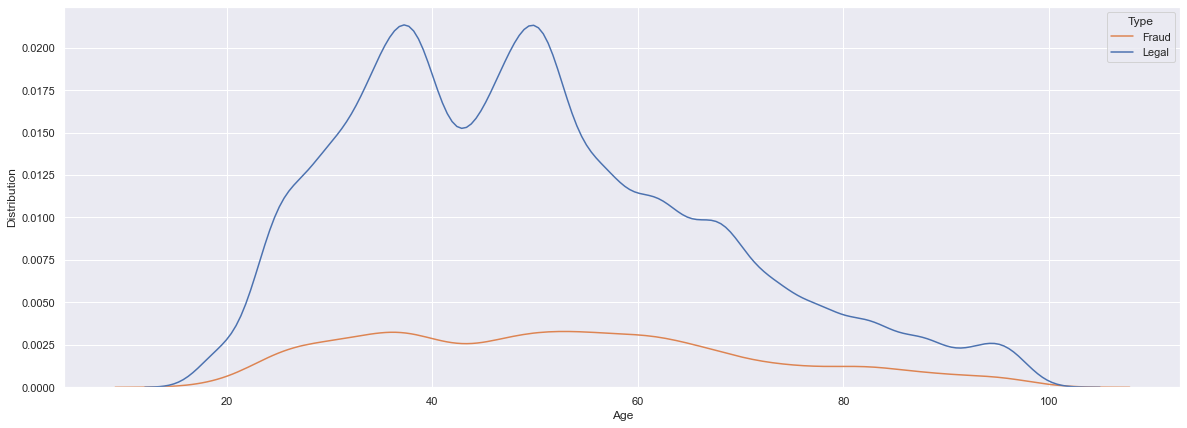

In [15]:
under_sampled_data['Age'] = dt.date.today().year - pd.to_datetime(under_sampled_data['dob']).dt.year
fig3 = sns.kdeplot(data = under_sampled_data, x = 'Age', hue = 'is_fraud')

fig3.set_xlabel("Age")
fig3.set_ylabel("Distribution")
fig3.legend(title = 'Type', labels = ['Fraud', 'Legal'])

The above plot clearly shows that older people are more prone to frauds as compared to the younger ones.

In [16]:
under_sampled_data.cc_num.describe()

count    5.790600e+04
mean     4.114905e+17
std      1.299833e+18
min      6.041621e+10
25%      1.800429e+14
50%      3.521261e+15
75%      4.635331e+15
max      4.992346e+18
Name: cc_num, dtype: float64

Category v/s Fraud

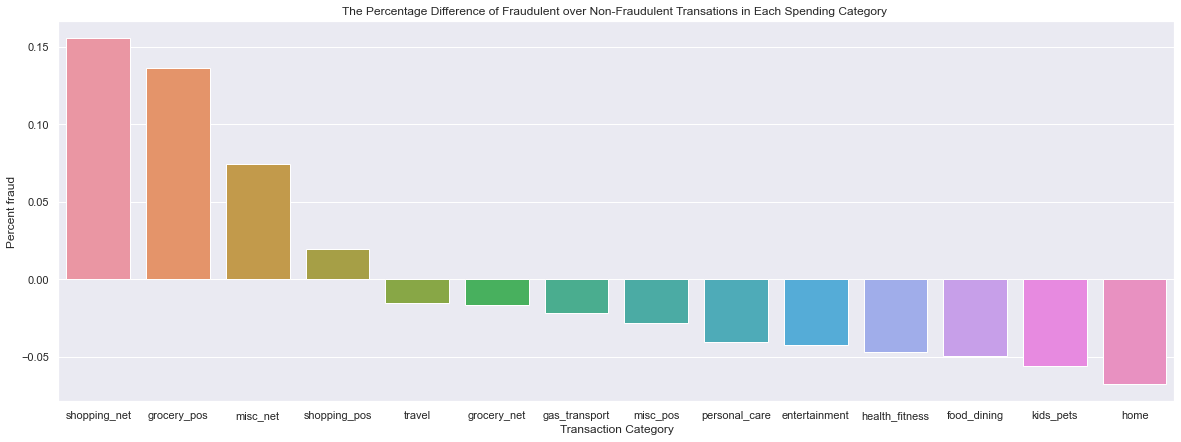

In [17]:
a = data['category'][data.is_fraud == 0].value_counts(normalize = True).to_frame().reset_index()
a.columns = ['category', 'type']

b = data['category'][data.is_fraud == 1].value_counts(normalize = True).to_frame().reset_index()
b.columns = ['category','type']

ab = a.merge(b, on = 'category')
ab['Diff'] = ab['type_y'] - ab['type_x']

fig = sns.barplot(y = 'Diff',x = 'category',data = ab.sort_values('Diff', ascending = False))
fig.set_xlabel('Transaction Category')
fig.set_ylabel('Percent fraud')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')
plt.savefig('Confusion matrix',dpi=300)

This shows a clear pattern that most fraud happens in case of shopping_net category and least in home category.

Dropping irrelevant columns to clear noise from data

In [18]:
clear_data = under_sampled_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'cc_num',
            'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
            'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis = 1)
print(clear_data.columns)

Index(['category', 'amt', 'is_fraud', 'Age'], dtype='object')


In [19]:
column_titles = ['category', 'amt', 'Age', 'is_fraud']
clear_data = clear_data.reindex(columns = column_titles)
clear_data.head()

,category,amt,Age,is_fraud
452453,health_fitness,7.98,48,0
1221004,kids_pets,148.16,40,0
291064,kids_pets,19.01,35,0
890869,misc_pos,2.95,63,0
489560,grocery_net,30.92,48,0


In [20]:
clear_data['category'].value_counts

<bound method IndexOpsMixin.value_counts of 452453     health_fitness
1221004         kids_pets
291064          kids_pets
890869           misc_pos
489560        grocery_net
                ...      
517197       shopping_pos
517274       shopping_pos
517341       shopping_net
517529        grocery_pos
517571           misc_net
Name: category, Length: 57906, dtype: object>

In [21]:
#One Hot Encoding to change categorical data into numerical values
one_hot_encoded = pd.get_dummies(clear_data, columns = ['category'])
one_hot_encoded.describe()

,amt,Age,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
count,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000,57906.000000
mean,144.947161,50.028719,0.166667,0.065762,0.061997,0.098384,0.031603,0.115947,0.058457,0.084067,0.078282,0.062204,0.057559,0.063845,0.100197,0.092771,0.028926
std,272.350661,17.549061,0.372681,0.247867,0.241152,0.297835,0.174942,0.320164,0.234607,0.277491,0.268617,0.241528,0.232909,0.244478,0.300265,0.290114,0.167601
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.522500,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.305000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,110.587500,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10469.090000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Building model and evaluation

In [22]:
#Splitting into training and testing set.
x = one_hot_encoded.drop(['is_fraud'], axis = 1)
y = one_hot_encoded['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = True)

Logistic Regression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)

c:\users\rishi kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#For testing data
predicted_value = model.predict(x_test)

In [26]:
print('Classification report:\n', classification_report(y_test, predicted_value))
c_mat = confusion_matrix(y_true = y_test, y_pred = predicted_value)
print('Confusion matrix:\n', c_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      9652
           1       0.94      0.70      0.80      1930

    accuracy                           0.94     11582
   macro avg       0.94      0.85      0.88     11582
weighted avg       0.94      0.94      0.94     11582

Confusion matrix:
 [[9564   88]
 [ 576 1354]]


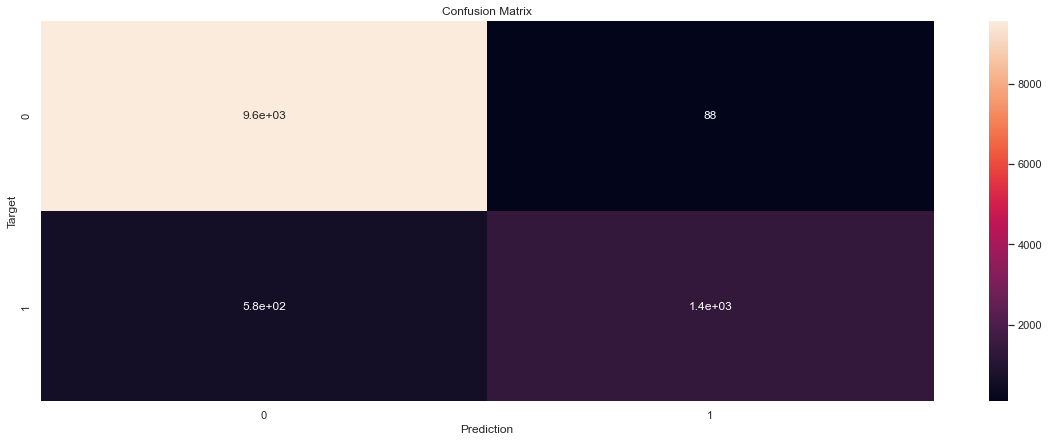

In [27]:
plt.figure()
sns.heatmap(c_mat, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.savefig('Confusion matrix',dpi=300)

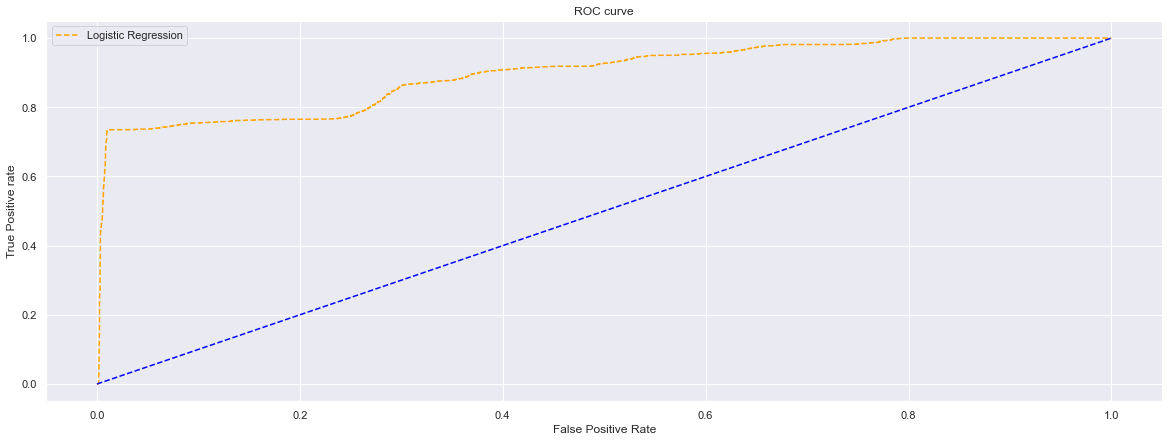

In [28]:
from sklearn.metrics import roc_curve
pred_prob1 = model.predict_proba(x_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print("auc score = ",auc_score1)

auc score =  0.8963537584629029


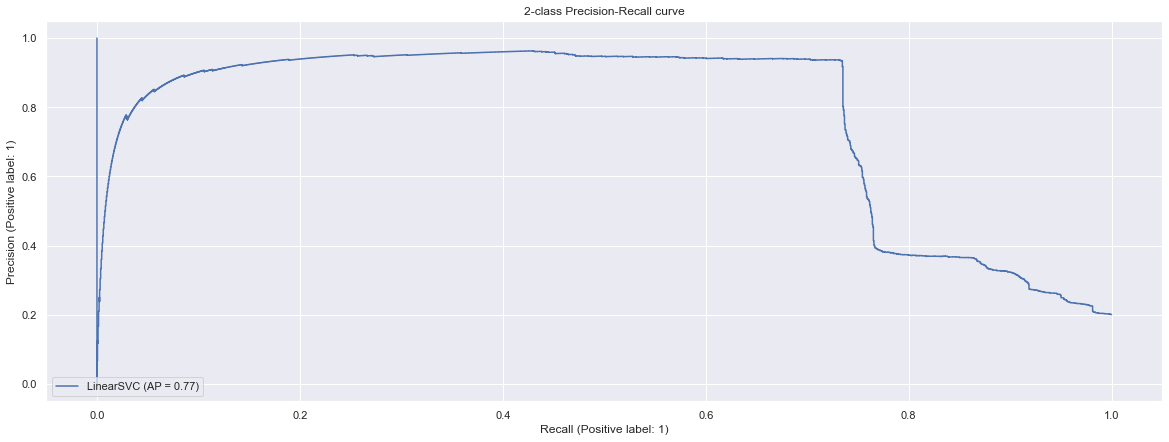

In [30]:
from sklearn.metrics import PrecisionRecallDisplay
y_score = model.decision_function(x_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")
plt.savefig('PR curve',dpi=300)